# Importing Libraries

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [20]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = test_set.class_names
print(class_name)


Found 760 files belonging to 38 classes.


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

# Loading Model

In [21]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')


## Visualising and Performing Prediction on Single image

In [23]:
import cv2


In [40]:
images_path = [
    'data/test/Apple___Black_rot/1.JPG',
    'data/test/Apple___Cedar_apple_rust/5.JPG',
    'data/test/Apple___healthy/13.JPG',
    'data/test/Tomato___Early_blight/1.JPG',
    'data/test/Cherry_(including_sour)___Powdery_mildew/9.JPG',
    'data/test/Cherry_(including_sour)___healthy/2.JPG',
    'data/test/Corn_(maize)___Common_rust_/20.JPG',
    'data/test/Corn_(maize)___Northern_Leaf_Blight/11.JPG',
]
results = []


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


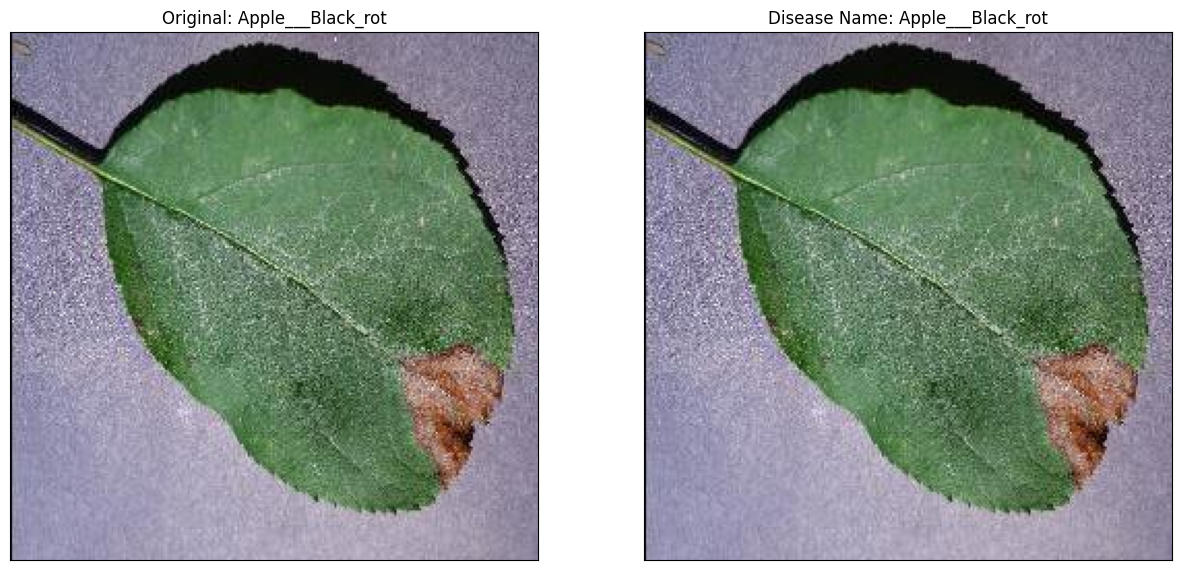

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


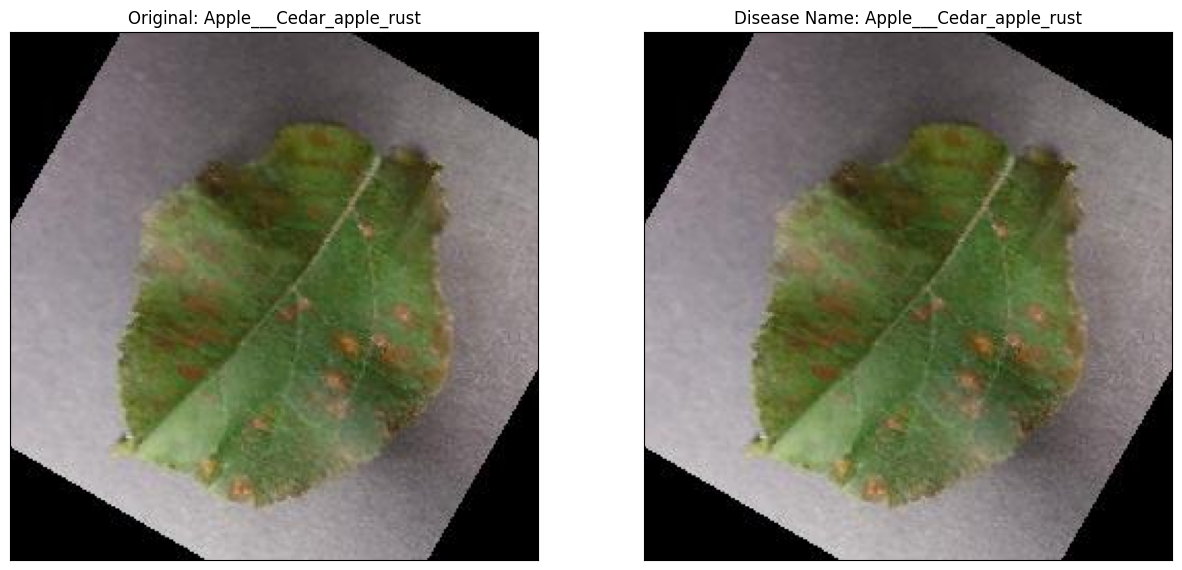

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


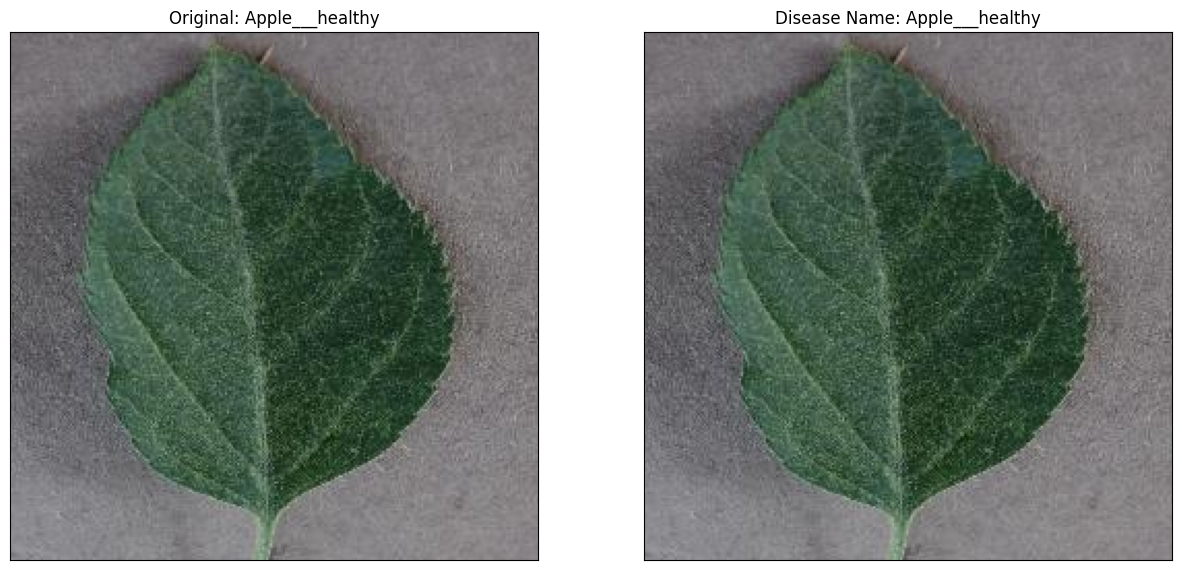

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


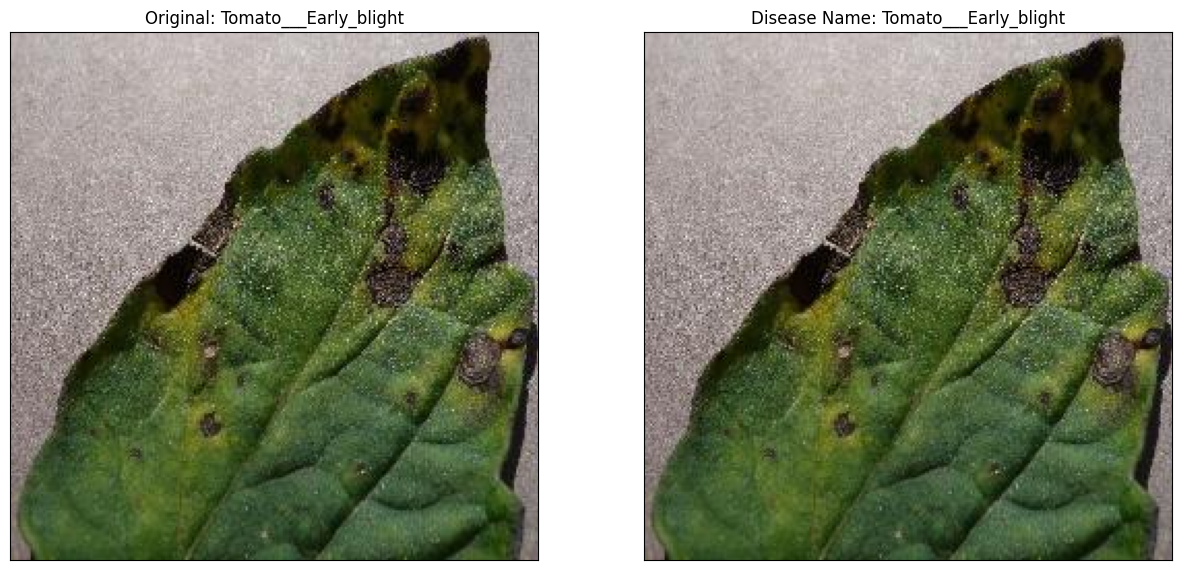

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


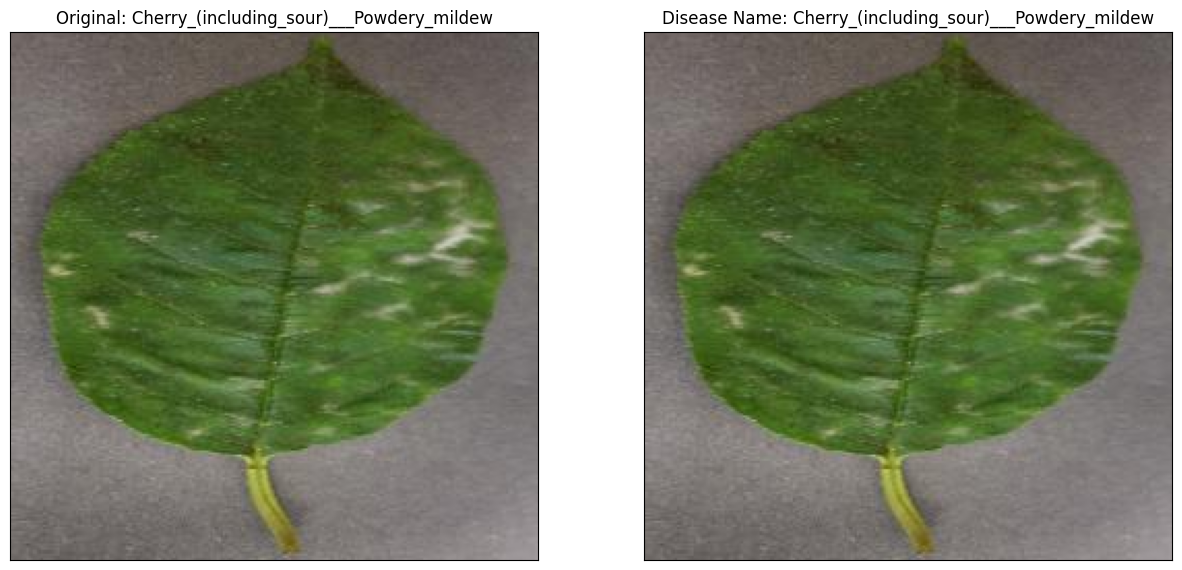

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


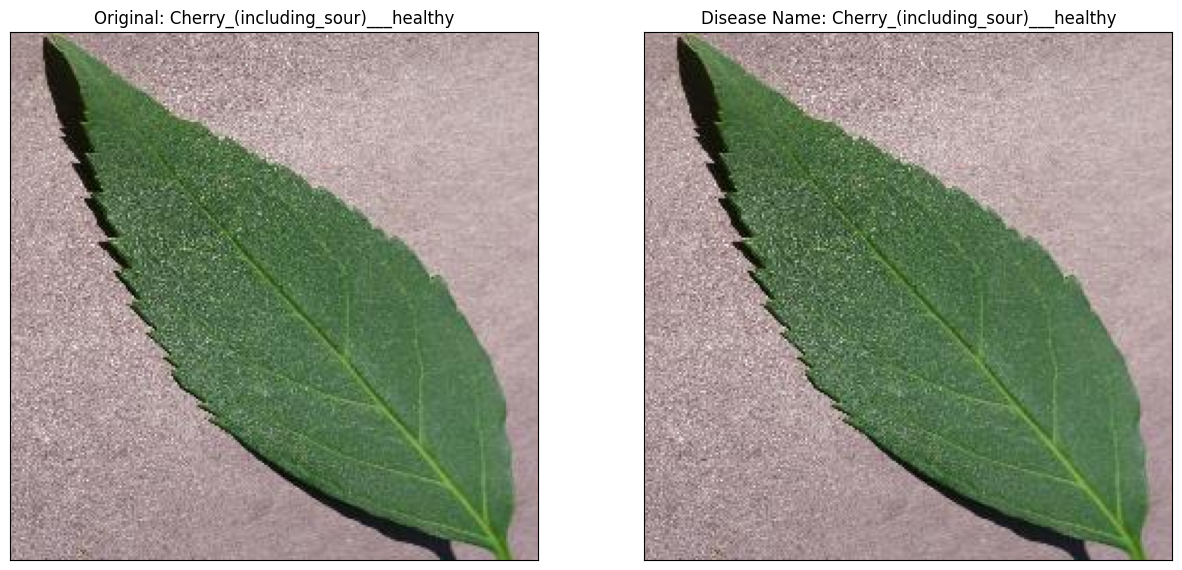

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


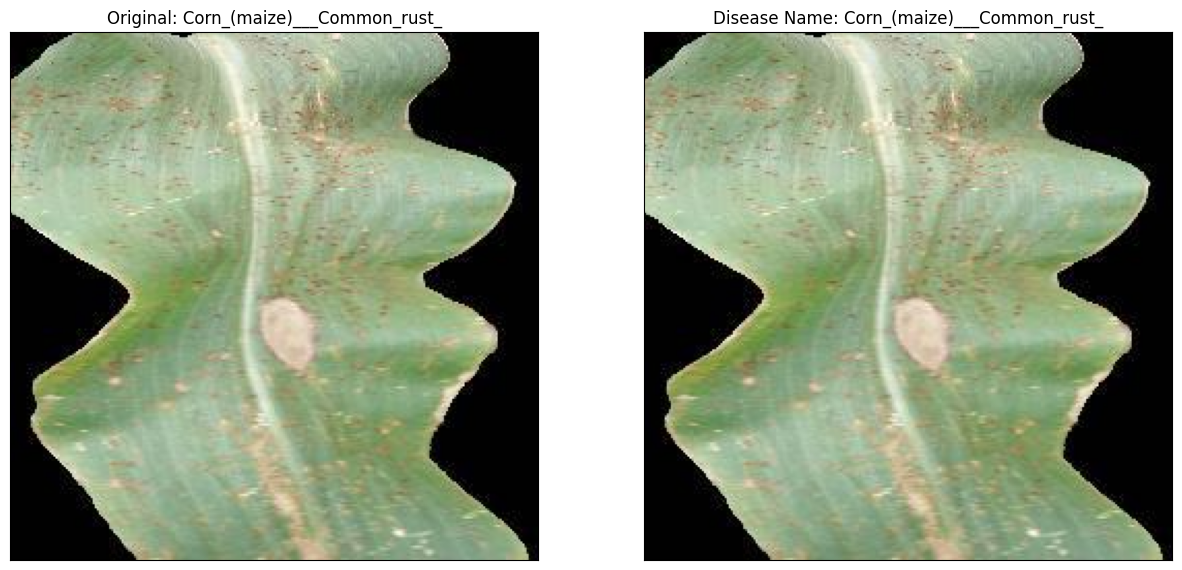

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


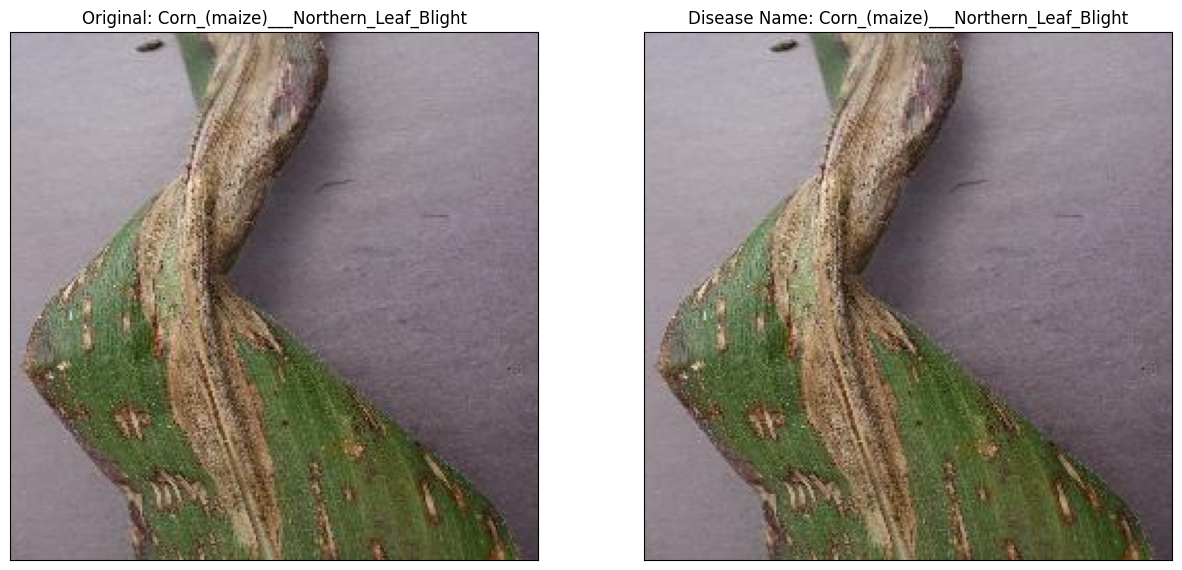

In [41]:
for image_path in images_path:
    # Load and display original image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 8))
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    title = image_path.split('/')[-2]
    plt.title(f"Original: {title}")
    plt.xticks([])
    plt.yticks([])

    # Load and preprocess image for prediction
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])

    # Make predictions
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions)
    model_prediction = class_name[result_index]

    # Display predicted disease
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title(f"Disease Name: {model_prediction}")
    plt.xticks([])
    plt.yticks([])

    # Show the plots
    plt.show()


In [18]:

image_path = 'data/test/Apple___Black_rot/1.JPG'




## Testing Model

In [ ]:
for result_index in results:
